# Bid data mart

In [64]:
import pandas as pd

In [65]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [66]:
#Combine test and train file in single file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)
data.head()

(8523, 13) (5681, 12) (14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [67]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [68]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

fill the null values 

In [69]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [70]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [71]:
#chcek the value counts of outlet sixe
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

# Plot each column according to it's item

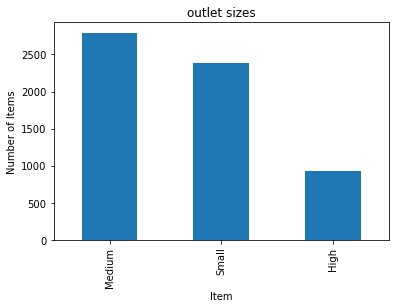

In [72]:
import matplotlib.pyplot as plt
train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('outlet sizes')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [73]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDF56     9
DRE49     9
FDF52     9
         ..
DRF48     1
FDQ60     1
FDC23     1
FDY43     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

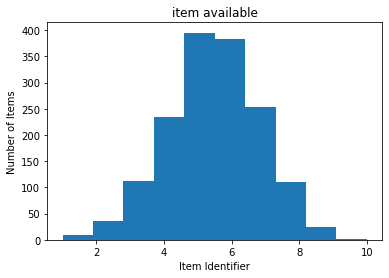

In [74]:
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('item available')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.show()


In [75]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

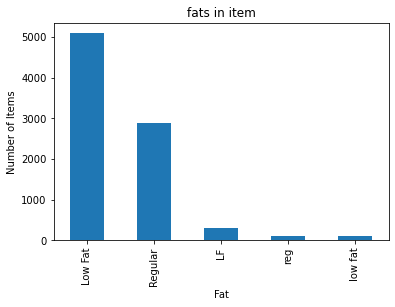

In [76]:
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('fats in item')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [77]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

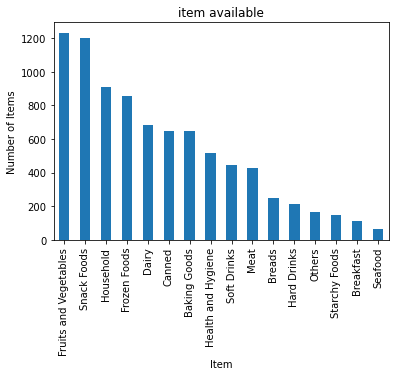

In [78]:
train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('item available')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [79]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

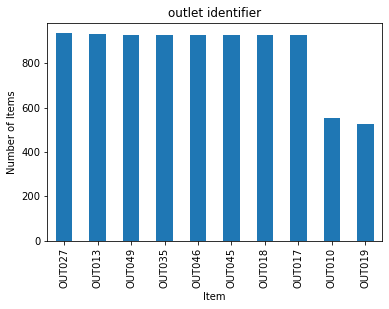

In [80]:
train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('outlet identifier')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [81]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

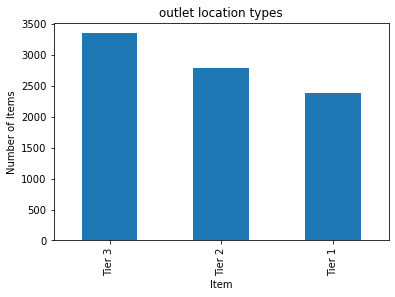

In [82]:
train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('outlet location types')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [83]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

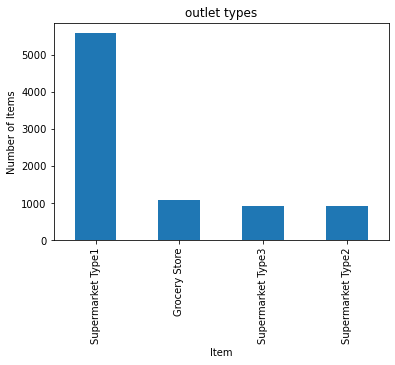

In [84]:
train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('outlet types')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [85]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

In [86]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

convert data to numerical

In [87]:
from sklearn.preprocessing import LabelEncoder

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,284,1,1097,4,7567,9,4,1,0,1,2541,1
1,8,57,2,1436,14,632,3,8,1,2,2,422,1
2,662,376,1,1172,10,3897,9,4,1,0,1,1639,1
3,1121,393,2,0,6,5626,0,3,1,2,0,670,1
4,1297,265,1,0,9,848,1,1,0,2,1,865,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,298,2,718,13,3881,8,2,2,0,1,1692,0
14200,308,180,2,11820,15,5069,3,8,1,2,2,1692,0
14201,1426,293,1,8009,8,3196,7,5,1,1,1,1692,0
14202,521,354,2,0,3,6626,2,7,1,1,1,1692,0


In [88]:
data = pd.get_dummies(data)

print(data.shape)

(14204, 1607)


In [89]:
#split the data
x = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [91]:
from sklearn.linear_model import  LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([2181.28891358, 2182.36025521, 5054.72778792, ..., 2181.28891358,
        263.4069631 , 1577.48550986])

In [92]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [93]:
lr_accuracy = round(regressor.score(x_train,y_train) * 100,2)
lr_accuracy

r2_score(y_train, regressor.predict(x_train))

0.6051035584047335

In [94]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
y_pred


array([2181.28891358, 2181.28891358, 5040.07731938, ..., 2181.28891358,
        205.57367619, 1643.22496131])

In [95]:
tree_accuracy = round(dt.score(x_train,y_train),2)
tree_accuracy
r2_score(y_train, dt.predict(x_train))

0.5589088556556709

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred

array([2181.28891358, 2188.55342278, 5021.7419286 , ..., 2181.28891358,
        292.51730401, 1608.27551168])

In [97]:
rf_accuracy = round(rf.score(x_train,y_train),2)
rf_accuracy
r2_score(y_train, rf.predict(x_train))

0.6078224557603761

# Random forest gives the best accuracy

In [98]:
import joblib
joblib.dump(rf,'bigmartproject.pkl')

['bigmartproject.pkl']